# Support Vector Regression



Modelo de Máquina de Vetor de Suporte para para predição de SCORE.


In [1]:
%run ../src/feature_engineering.py
%run ../src/model_evaluation.py
%run ../src/plot.py
%run ../src/pipeline.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 60)



In [3]:
course_df = pd.read_csv('../data/preprocessed/edx_2014_train.csv',low_memory=False)


course_df['grade'] = course_df['grade'].map(lambda g: g if g > 0 else 0)

class SvrRbf:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('poly', SVR(kernel='poly', C=1e3, cache_size=7000))])
    

#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)


results, plt = train_evaluate([SvrRbf()], course_df, split_criteria='course_id', feature_extractor=feature_extract, 
                              label='grade', evaluation=regression_evaluation, 
                              sample=10000,
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()



2019-05-31 08:47:15 Iniciando modelo SvrRbf
Testando modelo
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', SVR(C=1000.0, cache_size=7000, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])
2019-05-31 08:47:15 Iniciando curso CB22x
(10000, 35)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-ee8bad9d1be6>", line 19, in <module>
    plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])
  File "C:\Users\Marcelo\Documents\Doutorado\Projeto\mooc-data\src\pipeline.py", line 65, in train_evaluate
    train = course.sample(frac=0.95 if provider.require_balance() else 0.6, random_state=42)
AttributeError: 'SvrRbf' object has no attribute 'require_balance'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occu

AttributeError: 'SvrRbf' object has no attribute 'require_balance'

In [17]:
reform = {(level2_key, level3_key): values
              for level1_key, level2_dict in results.items()
              for level2_key, level3_dict in level2_dict.items()
              for level3_key, values      in level3_dict.items()}


NameError: name 'results' is not defined

In [11]:
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(reform, index=['SVM']).T

SVM
2.01x  explained_variance_score  0.8929
       mean_absolute_error       0.0500
       mean_squared_error        0.0045
       r2_score                  0.8606
6.002x explained_variance_score  0.9193
       mean_absolute_error       0.0646
       mean_squared_error        0.0055
       r2_score                  0.8388
6.00x  explained_variance_score  0.8515
       mean_absolute_error       0.0562
       mean_squared_error        0.0039
       r2_score                  0.7372
7.00x  explained_variance_score  0.8946
       mean_absolute_error       0.0800
       mean_squared_error        0.0072
       r2_score                  0.7084
8.02x  explained_variance_score  0.8912
       mean_absolute_error       0.0383
       mean_squared_error        0.0025
       r2_score                  0.8662
8.MReV explained_variance_score  0.8998
       mean_absolute_error       0.0262
       mean_squared_error        0.0020
       r2_score                  0.8985
CB22x  explained_variance_score  0.8762
       mean_absolute_error       0.0659
       mean_squared_error        0.0048
       r2_score                  0.3822
CS50x  explained_variance_score  0.9602
       mean_absolute_error       0.0996
       mean_squared_error        0.0099
       r2_score                 -0.3650
ER22x  explained_variance_score  0.9070
       mean_absolute_error       0.0997
       mean_squared_error        0.0106
       r2_score                  0.6266
PH207x explained_variance_score  0.8816
       mean_absolute_error       0.0566
       mean_squared_error        0.0063
       r2_score                  0.8518

2018-06-03 23:28:08 Iniciando modelo SvrRbf
2018-06-03 23:28:08 Iniciando curso CB22x
2018-06-03 23:36:25 Treinamento OK!
[-0.09595392 -0.09967369 -0.09993402 ... -0.09911732 -0.09963723
 -0.08909379]
2018-06-03 23:36:26 Resultados {'mean_squared_error': 0.19178373163958534, 'mean_absolute_error': 0.2648668231522017, 'explained_variance_score': -0.07298564291423526, 'r2_score': -0.12951440897461164}
2018-06-03 23:36:26 Iniciando curso CS50x
2018-06-03 23:36:35 Treinamento OK!
[-0.09998659 -0.09984559 -0.09989517 ... -0.09993842 -0.09963251
 -0.09998659]
2018-06-03 23:36:35 Resultados {'mean_squared_error': 0.01675719468408039, 'mean_absolute_error': 0.10367658039292323, 'explained_variance_score': 0.4797757005573816, 'r2_score': 0.0424323385145281}
2018-06-03 23:36:35 Iniciando curso ER22x
2018-06-03 23:40:16 Treinamento OK!
[-0.09747924 -0.09834256 -0.00367098 ... -0.09139122  0.79981766
 -0.09996384]
2018-06-03 23:40:17 Resultados {'mean_squared_error': 0.128266244647768, 'mean_absol

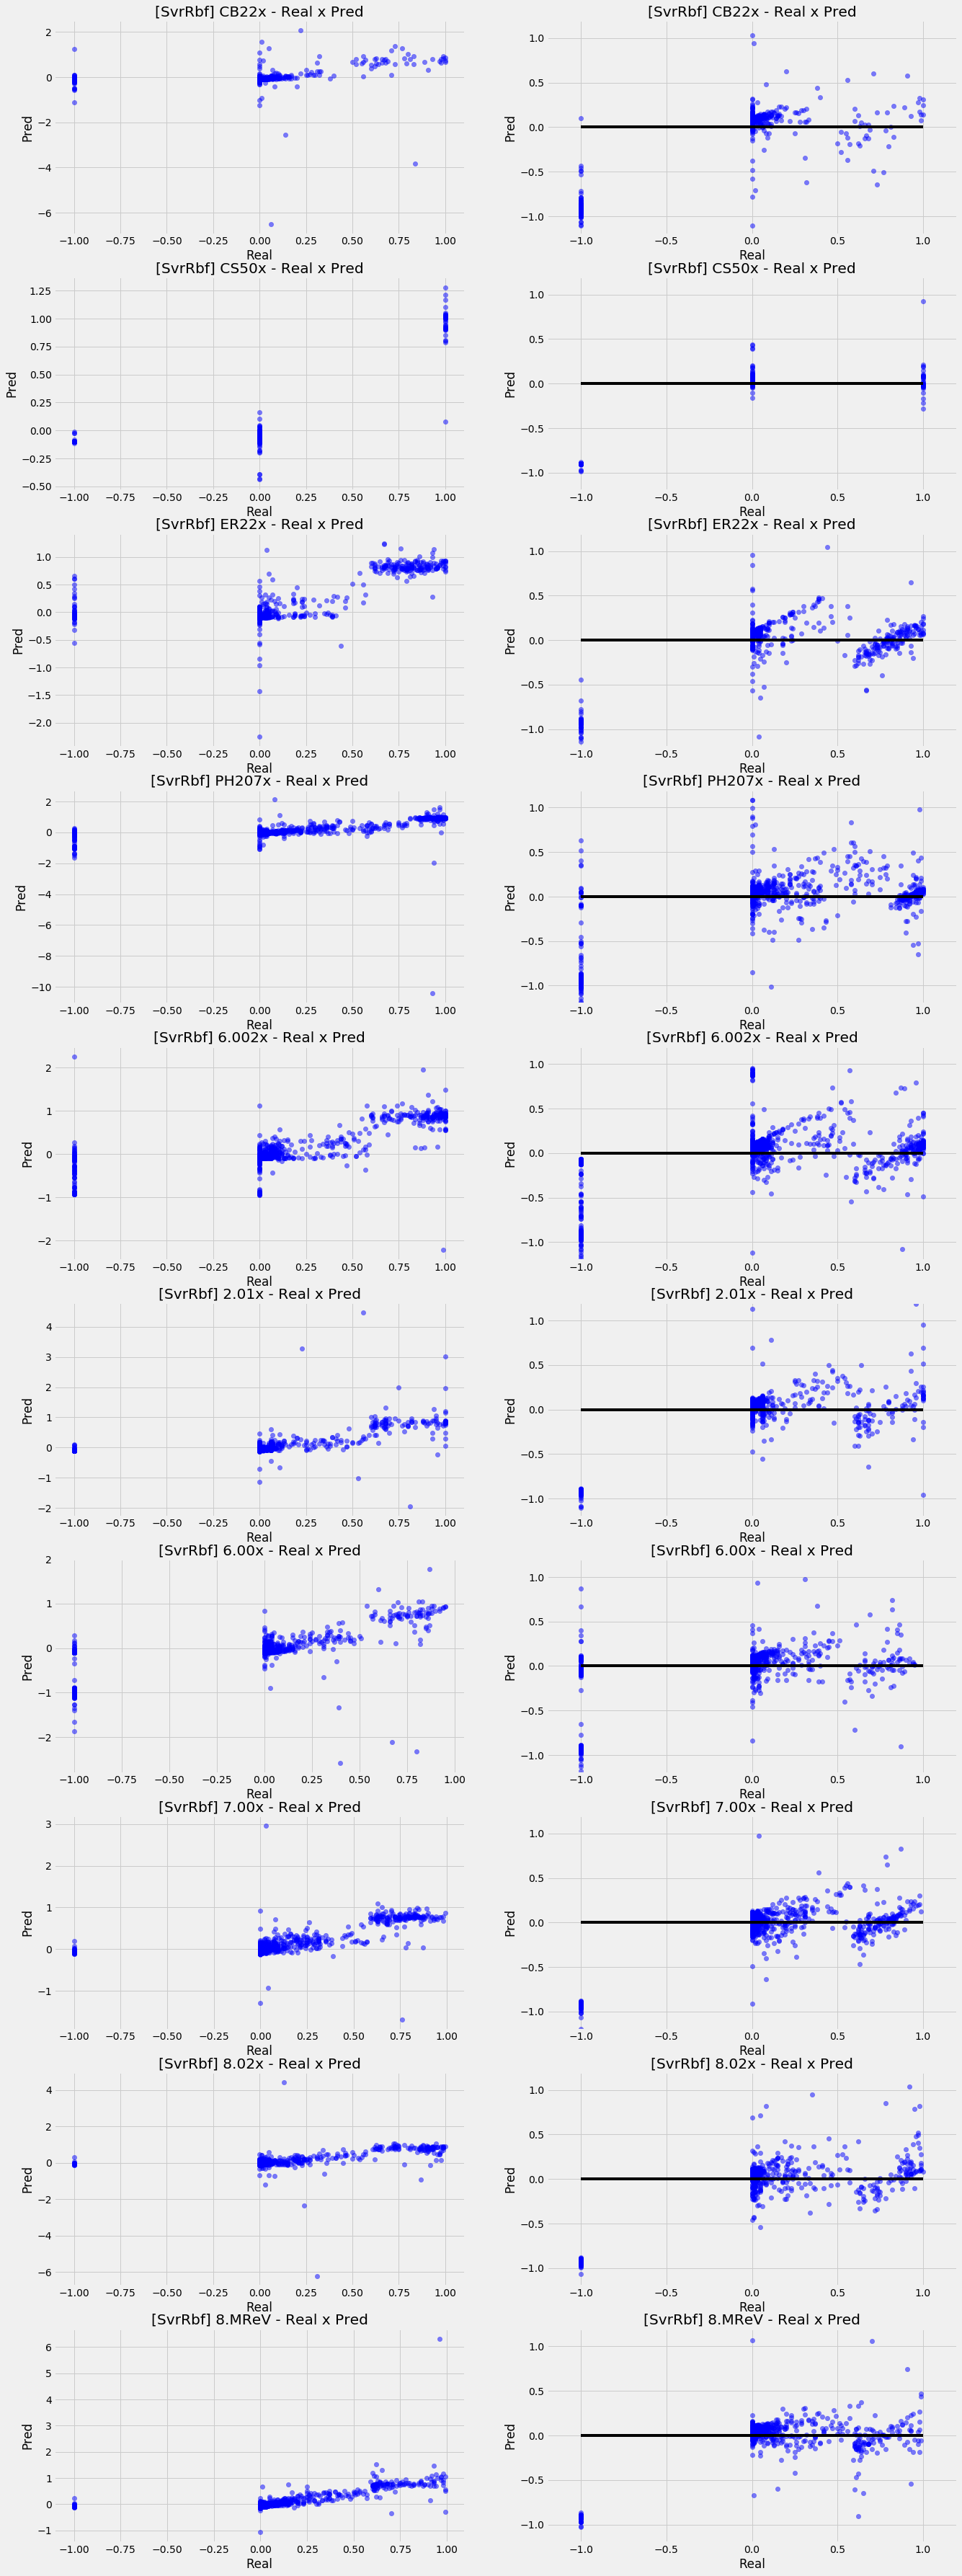

In [12]:
course_df = pd.read_csv('../data/preprocessed/edx_2014_train.csv',low_memory=False)

class SvrRbf:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('poly', SVR(kernel='poly', cache_size = 7000))])
    

#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)


results, plt = train_evaluate([SvrRbf()], course_df, split_criteria='course_id', feature_extractor=feature_extract, 
                              label='grade', evaluation=regression_evaluation, 
                              sample=10000,
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()


In [9]:
course_df.shape[0]

464346

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]